In [1]:
import os
from pathlib import Path
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
#az.style.use("arviz-darkgrid")
plt.style.use('ggplot')

In [3]:
# True parameter values
mu=0
sigma=1

# sample sizes for the different simulations
n_factors = np.array([10, 50, 100, 200, 250, 1000, 5000, 10000])

pathstr = "./data/observations/n{n}.csv"
for n in n_factors:
    file = Path(pathstr.format(n=n))
    if file.exists(): # check if this data has already been generated
        print(f"File {file} exists, n={n} random sample creation skipped!")
        continue
    
    if file.parent: # create parents dir if not already
        file.parent.mkdir(parents=True, exist_ok=True)

    obs = np.random.normal(loc=mu, scale=sigma, size=n)
    np.savetxt(
        file, obs,
        delimiter=',',          # Use semicolon as delimiter
        comments='# '           # Use '# ' as the comment character
    )
    print(f"Created {file} with {n} random samples")

File data/observations/n10.csv exists, n=10 random sample creation skipped!
File data/observations/n50.csv exists, n=50 random sample creation skipped!
File data/observations/n100.csv exists, n=100 random sample creation skipped!
File data/observations/n200.csv exists, n=200 random sample creation skipped!
File data/observations/n250.csv exists, n=250 random sample creation skipped!
File data/observations/n1000.csv exists, n=1000 random sample creation skipped!
File data/observations/n5000.csv exists, n=5000 random sample creation skipped!
Created data/observations/n10000.csv with 10000 random samples


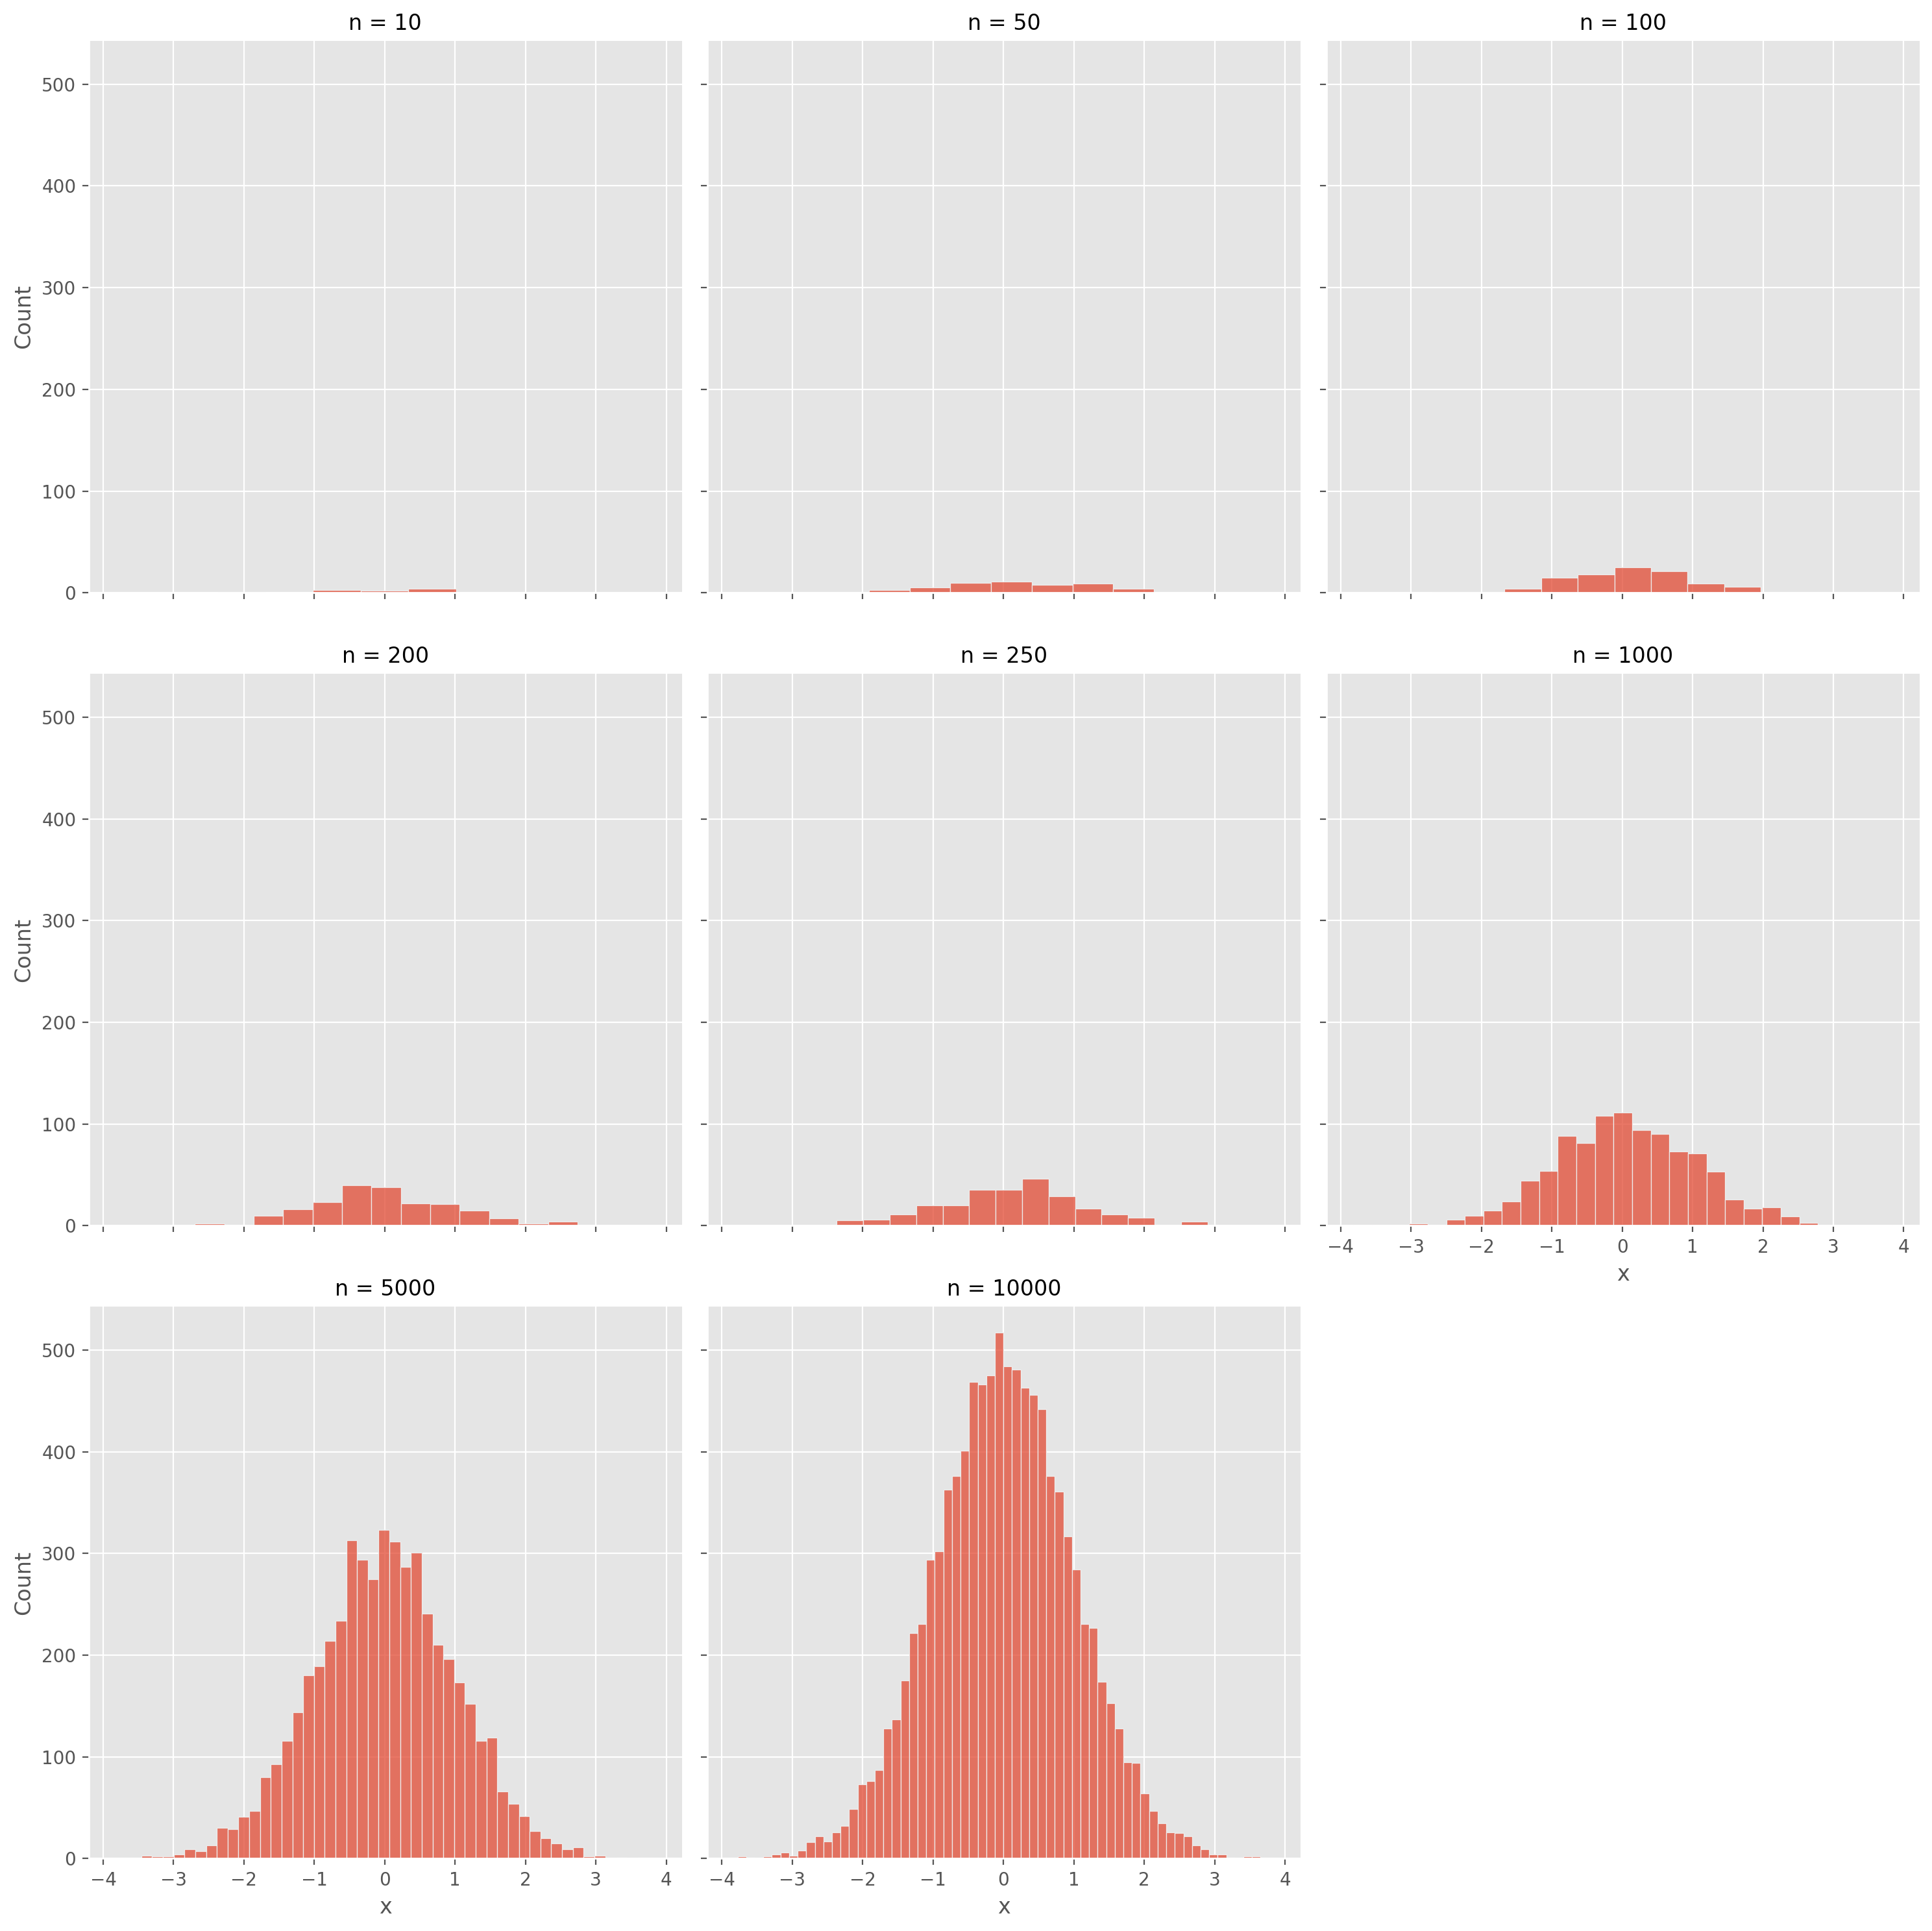

In [4]:
# time to plot the samples for visual inspection
#fig, axes = plt.subplots(nrows=math.ceil(len(n_factors)/2), ncols=2, figsize=(12, 10))
# Flatten the axes array for easy iteration
#axes = axes.flatten()

dfs = []
for i, n in enumerate(n_factors):
    file = Path(pathstr.format(n=n))
    x = np.loadtxt(file, delimiter=',')
    dfs.append(pd.DataFrame({'x': x, 'n': n}))
#    ax = axes[i]
#    ax.hist(x, 
#                 label=f"Standard normal random sample (n={n})")
df = pd.concat(dfs, ignore_index=True)
g = sns.displot(
    data=df,
    x='x',
    col='n',           # This creates the separate subplots for each sample
    col_wrap=3,
#    bins=30,                # Number of bins
#    kde=True,               # Overlay a Kernel Density Estimate
#    stat='count',           # Show counts on the y-axis (default)
#    palette='viridis',      # Color palette
#    alpha=0.7,              # Transparency
    common_bins=False,      # Each subplot gets its own bin range based on its data
#    common_norm=True       # Each subplot's y-axis is normalized independently
)
plt.show()